In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A_ex = 1 * np.sqrt((1 + 3*0.1) / (3*1 + 0.1))
pars = [7**2, 127**2]
a_ex = [A_ex, A_ex]

In [3]:
upper_bounds_FE = []
lower_bounds_FE = []
grid_size = np.array([8, 16, 32, 64, 128]) + 1
for N in grid_size:
    upper_bounds_FE.append(np.load(f'bounds/exact/A_u_fem_{N}.npy')[0,0])
    lower_bounds_FE.append(np.load(f'bounds/exact/A_l_fem_{N}.npy')[0,0])
upper_bounds_FE = np.array(upper_bounds_FE)
lower_bounds_FE = np.array(lower_bounds_FE)

In [4]:
upper_bounds_FE_i = []
lower_bounds_FE_i = []
grid_size_i = np.array([8, 16, 32, 64, 128]) + 1
for N in grid_size_i:
    upper_bounds_FE_i.append(np.load(f'bounds/exact/A_u_fem_i_{N}.npy')[0,0])
    lower_bounds_FE_i.append(np.load(f'bounds/exact/A_l_fem_i_{N}.npy')[0,0])
upper_bounds_FE_i = np.array(upper_bounds_FE_i)
lower_bounds_FE_i = np.array(lower_bounds_FE_i)

In [69]:
upper_bounds_PINN = []
lower_bounds_PINN = []
upper_bounds_PINN_i = []
lower_bounds_PINN_i = []
par_size = np.array([65, 391, 1801, 10081])

res = 129
for N in par_size:
    upper_bounds_PINN.append(np.load(f'bounds/square/A_u_PINN_{N}_{res}.npy')[0])
    lower_bounds_PINN.append(np.load(f'bounds/square/A_l_PINN_{N}_{res}.npy')[0])
    upper_bounds_PINN_i.append(np.load(f'bounds/square/A_u_PINN_{N}_{res}.npy')[1])
    lower_bounds_PINN_i.append(np.load(f'bounds/square/A_l_PINN_{N}_{res}.npy')[1])
upper_bounds_PINN = np.array(upper_bounds_PINN)
lower_bounds_PINN = np.array(lower_bounds_PINN)
upper_bounds_PINN_i = np.array(upper_bounds_PINN_i)
lower_bounds_PINN_i = np.array(lower_bounds_PINN_i)

In [ ]:
upper_bounds_PINN_hr = []
lower_bounds_PINN_hr = []
upper_bounds_PINN_i_hr = []
lower_bounds_PINN_i_hr = []

res = 1025
for N in par_size:
    upper_bounds_PINN_hr.append(np.load(f'bounds/square/A_u_PINN_{N}_{res}.npy')[0])
    lower_bounds_PINN_hr.append(np.load(f'bounds/square/A_l_PINN_{N}_{res}.npy')[0])
    upper_bounds_PINN_i_hr.append(np.load(f'bounds/square/A_u_PINN_{N}_{res}.npy')[1])
    lower_bounds_PINN_i_hr.append(np.load(f'bounds/square/A_l_PINN_{N}_{res}.npy')[1])
upper_bounds_PINN_hr = np.array(upper_bounds_PINN_hr)
lower_bounds_PINN_hr = np.array(lower_bounds_PINN)
upper_bounds_PINN_i_hr = np.array(upper_bounds_PINN_i_hr)
lower_bounds_PINN_i_hr = np.array(lower_bounds_PINN_i_hr)

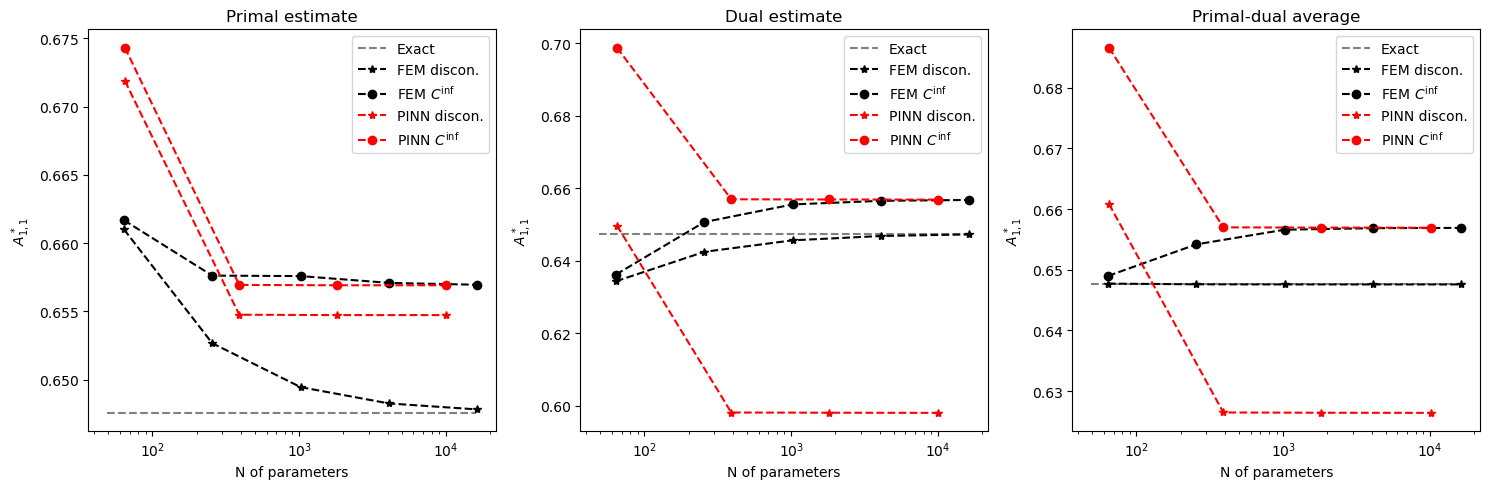

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].plot(pars, a_ex, '--', c='grey')
axs[0].plot((grid_size-1)**2, upper_bounds_FE, 'k--*')
axs[0].plot((grid_size_i-1)**2, upper_bounds_FE_i, 'k--o')
axs[0].plot(par_size, upper_bounds_PINN, 'r--*')
axs[0].plot(par_size, upper_bounds_PINN_i, 'r--o')
axs[0].set_xlabel('N of parameters')
axs[0].set_ylabel('$A^*_{1,1}$')
axs[0].legend(['Exact', 'FEM discon.', 'FEM $C^\inf$', 'PINN discon.', 'PINN $C^\inf$'])
axs[0].set_xscale('log')
axs[0].set_title('Primal estimate')

axs[1].plot(pars, a_ex, '--', c='grey')
axs[1].plot((grid_size-1)**2, lower_bounds_FE, 'k--*')
axs[1].plot((grid_size_i-1)**2, lower_bounds_FE_i, 'k--o')
axs[1].plot(par_size, lower_bounds_PINN, 'r--*')
axs[1].plot(par_size, lower_bounds_PINN_i, 'r--o')
axs[1].set_xlabel('N of parameters')
axs[1].set_ylabel('$A^*_{1,1}$')
axs[1].legend(['Exact', 'FEM discon.', 'FEM $C^\inf$', 'PINN discon.', 'PINN $C^\inf$'])
axs[1].set_xscale('log')
axs[1].set_title('Dual estimate')

axs[2].plot(pars, a_ex, '--', c='grey')
axs[2].plot((grid_size-1)**2, (upper_bounds_FE+lower_bounds_FE)/2, 'k--*')
axs[2].plot((grid_size_i-1)**2, (upper_bounds_FE_i+lower_bounds_FE_i)/2, 'k--o')
axs[2].plot(par_size, (upper_bounds_PINN+lower_bounds_PINN)/2, 'r--*')
axs[2].plot(par_size, (upper_bounds_PINN_i+lower_bounds_PINN_i)/2, 'r--o')
axs[2].set_xlabel('N of parameters')
axs[2].set_ylabel('$A^*_{1,1}$')
axs[2].legend(['Exact', 'FEM discon.', 'FEM $C^\inf$', 'PINN discon.', 'PINN $C^\inf$'])
axs[2].set_xscale('log')
axs[2].set_title('Primal-dual average')

plt.tight_layout()

In [48]:
upper_bounds_VNPINN = []
lower_bounds_VNPINN = []
par_size = np.array([65, 391, 1801])
N_test = 200
for N in par_size:
    upper_bounds_VNPINN.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy'))
    lower_bounds_VNPINN.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy'))
upper_bounds_VNPINN = np.array(upper_bounds_VNPINN)
lower_bounds_VNPINN = np.array(lower_bounds_VNPINN)

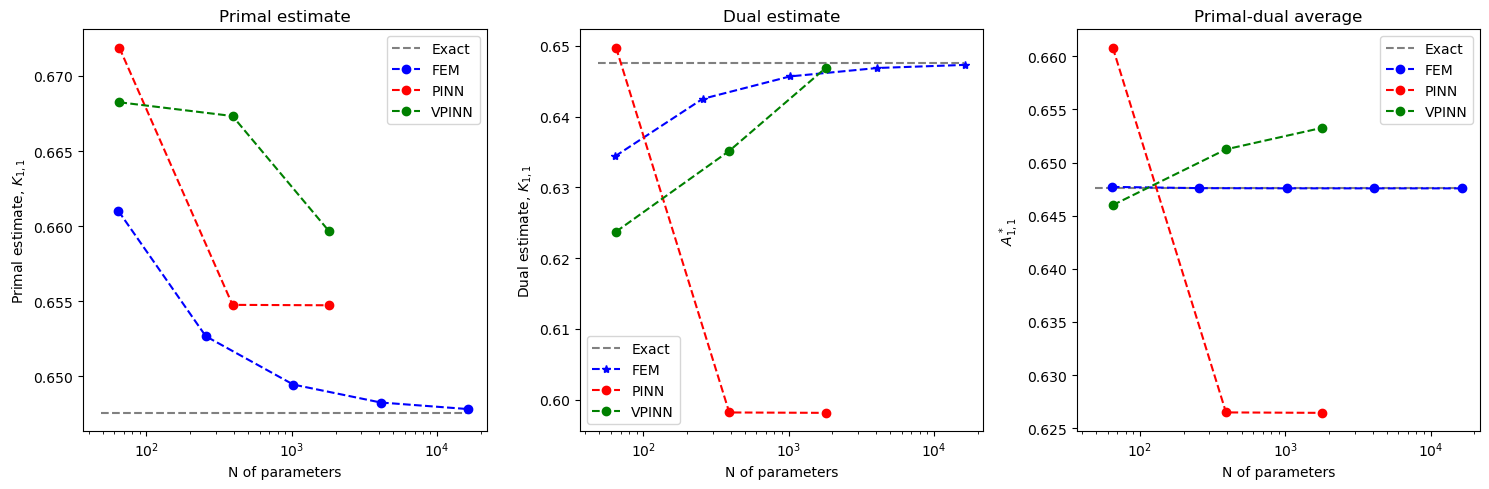

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].plot(pars, a_ex, '--', c='grey')
axs[0].plot((grid_size-1)**2, upper_bounds_FE, 'b--o')
axs[0].plot(par_size, upper_bounds_PINN, 'r--o')
axs[0].plot(par_size, upper_bounds_VNPINN, 'g--o')
axs[0].set_xlabel('N of parameters')
axs[0].set_ylabel('Primal estimate, $K_{1,1}$')
axs[0].legend(['Exact', 'FEM', 'PINN', 'VPINN', 'VSPINN'])
axs[0].set_xscale('log')
axs[0].set_title('Primal estimate')

axs[1].plot(pars, a_ex, '--', c='grey')
axs[1].plot((grid_size-1)**2, lower_bounds_FE, 'b--*')
axs[1].plot(par_size, lower_bounds_PINN, 'r--o')
axs[1].plot(par_size, lower_bounds_VNPINN, 'g--o')
axs[1].set_xlabel('N of parameters')
axs[1].set_ylabel('Dual estimate, $K_{1,1}$')
axs[1].legend(['Exact', 'FEM', 'PINN', 'VPINN'])
axs[1].set_xscale('log')
axs[1].set_title('Dual estimate')

axs[2].plot(pars, a_ex, '--', c='grey')
axs[2].plot((grid_size-1)**2, (upper_bounds_FE+lower_bounds_FE)/2, 'b--o')
axs[2].plot(par_size, (upper_bounds_PINN+lower_bounds_PINN)/2, 'r--o')
axs[2].plot(par_size, (upper_bounds_VNPINN+lower_bounds_VNPINN)/2, 'g--o')
axs[2].set_xlabel('N of parameters')
axs[2].set_ylabel('$A^*_{1,1}$')
axs[2].legend(['Exact', 'FEM', 'PINN', 'VPINN'])
axs[2].set_xscale('log')
axs[2].set_title('Primal-dual average')

plt.tight_layout()

In [71]:
upper_bounds_VSPINN = []
lower_bounds_VSPINN = []
par_size = np.array([65, 391, 1801])
N_test = 126
for N in par_size:
    upper_bounds_VSPINN.append(np.load(f'bounds/square/A_u_VSPINN_{N}_{N_test}.npy'))
    lower_bounds_VSPINN.append(np.load(f'bounds/square/A_l_VSPINN_{N}_{N_test}.npy'))
upper_bounds_VSPINN = np.array(upper_bounds_VSPINN)
lower_bounds_VSPINN = np.array(lower_bounds_VSPINN)

In [52]:
upper_bounds_VNPINN_50 = []
lower_bounds_VNPINN_50 = []
par_size = np.array([65, 391, 1801])
N_test = 50
for N in par_size:
    upper_bounds_VNPINN_50.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy'))
    lower_bounds_VNPINN_50.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy'))
upper_bounds_VNPINN_50 = np.array(upper_bounds_VNPINN_50)
lower_bounds_VNPINN_50 = np.array(lower_bounds_VNPINN_50)

In [53]:
upper_bounds_VNPINN_100 = []
lower_bounds_VNPINN_100 = []
par_size = np.array([65, 391, 1801])
N_test = 100
for N in par_size:
    upper_bounds_VNPINN_100.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy'))
    lower_bounds_VNPINN_100.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy'))
upper_bounds_VNPINN_100 = np.array(upper_bounds_VNPINN_100)
lower_bounds_VNPINN_100 = np.array(lower_bounds_VNPINN_100)

In [54]:
upper_bounds_VNPINN_200 = []
lower_bounds_VNPINN_200 = []
par_size = np.array([65, 391, 1801])
N_test = 200
for N in par_size:
    upper_bounds_VNPINN_200.append(np.load(f'bounds/square/A_u_VNPINN_{N}_{N_test}.npy'))
    lower_bounds_VNPINN_200.append(np.load(f'bounds/square/A_l_VNPINN_{N}_{N_test}.npy'))
upper_bounds_VNPINN_200 = np.array(upper_bounds_VNPINN_200)
lower_bounds_VNPINN_200 = np.array(lower_bounds_VNPINN_200)

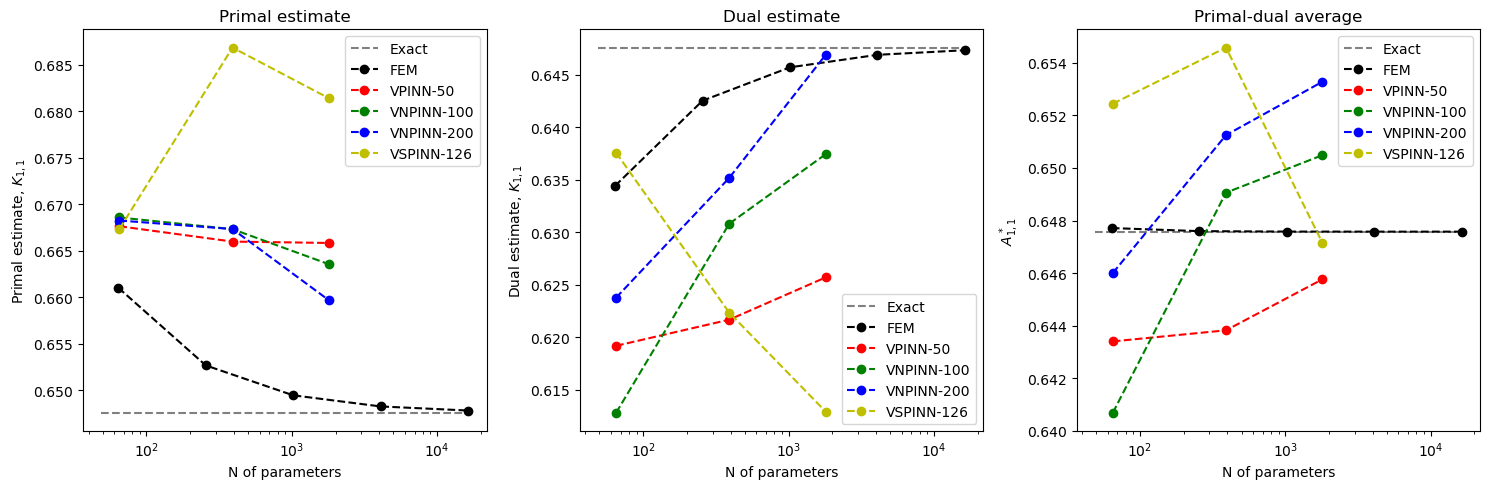

In [76]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs[0].plot(pars, a_ex, '--', c='grey')
axs[0].plot((grid_size-1)**2, upper_bounds_FE, 'k--o')
axs[0].plot(par_size, upper_bounds_VNPINN_50, 'r--o')
axs[0].plot(par_size, upper_bounds_VNPINN_100, 'g--o')
axs[0].plot(par_size, upper_bounds_VNPINN_200, 'b--o')
axs[0].plot(par_size, upper_bounds_VSPINN, 'y--o')
axs[0].set_xlabel('N of parameters')
axs[0].set_ylabel('Primal estimate, $K_{1,1}$')
axs[0].legend(['Exact', 'FEM', 'VPINN-50', 'VNPINN-100', 'VNPINN-200', 'VSPINN-126'])
axs[0].set_xscale('log')
axs[0].set_title('Primal estimate')

axs[1].plot(pars, a_ex, '--', c='grey')
axs[1].plot((grid_size-1)**2, lower_bounds_FE, 'k--o')
axs[1].plot(par_size, lower_bounds_VNPINN_50, 'r--o')
axs[1].plot(par_size, lower_bounds_VNPINN_100, 'g--o')
axs[1].plot(par_size, lower_bounds_VNPINN_200, 'b--o')
axs[1].plot(par_size, lower_bounds_VSPINN, 'y--o')
axs[1].set_xlabel('N of parameters')
axs[1].set_ylabel('Dual estimate, $K_{1,1}$')
axs[1].legend(['Exact', 'FEM', 'VPINN-50', 'VNPINN-100', 'VNPINN-200', 'VSPINN-126'])
axs[1].set_xscale('log')
axs[1].set_title('Dual estimate')

axs[2].plot(pars, a_ex, '--', c='grey')
axs[2].plot((grid_size-1)**2, (upper_bounds_FE+lower_bounds_FE)/2, 'k--o')
axs[2].plot(par_size, (upper_bounds_VNPINN_50+lower_bounds_VNPINN_50)/2, 'r--o')
axs[2].plot(par_size, (upper_bounds_VNPINN_100+lower_bounds_VNPINN_100)/2, 'g--o')
axs[2].plot(par_size, (upper_bounds_VNPINN_200+lower_bounds_VNPINN_200)/2, 'b--o')
axs[2].plot(par_size, (upper_bounds_VSPINN+lower_bounds_VSPINN)/2, 'y--o')
axs[2].set_xlabel('N of parameters')
axs[2].set_ylabel('$A^*_{1,1}$')
axs[2].legend(['Exact', 'FEM', 'VPINN-50', 'VNPINN-100', 'VNPINN-200', 'VSPINN-126'])
axs[2].set_xscale('log')
axs[2].set_title('Primal-dual average')

plt.tight_layout()